#### Higher-Order Node Clustering in Bipartite Graphs Using the Kamei-Cock Algorithm
Application of the algorithm below, using Kamei & Cock [1] (pseudocode from [2]) to some toy hypergraphs, following algorithm 1 of [3].
To apply the algorithm, we need to transform the hypergraph into a bipartite graph.


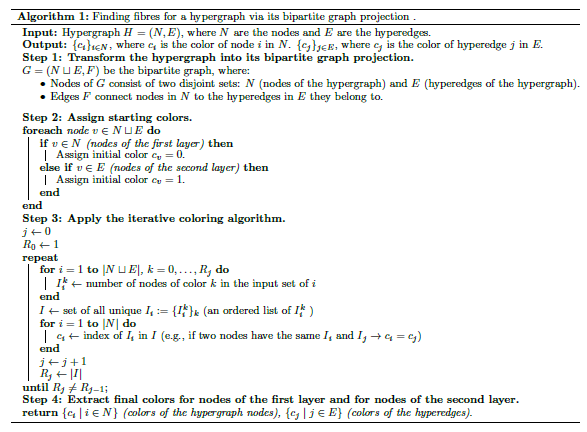


_References:_

[1] _H. Kamei, P. J. A. Cock, ["Computational of balanced relations and their lattice for a coupled cell network"](https://arxiv.org/abs/1211.6334). SIAM J. Appl. Dyn. Syst. 12, 352–382 (2013)._

[2] _Morone, Flaviano, Ian Leifer, and Hernán A. Makse. ["Fibration symmetries uncover the building blocks of biological networks."](https://www.pnas.org/doi/abs/10.1073/pnas.1914628117) Proceedings of the National Academy of Sciences 117.15 (2020): 8306-8314._

[3] _Bertè, Margherita, and Tommaso Gili. ["Fibration Symmetries and Cluster Synchronization in Multi-Body Systems."](https://arxiv.org/abs/2510.11207)(2025)._

In [1]:
# Graphs Handling library
import sys
sys.path.insert(0, '../Utilities')

import networkx as nx
from networkx.algorithms import bipartite

# For the plot
import matplotlib.pyplot as plt
# colors
import seaborn as sns
import colorcet as cc

# Hypergraphs handling library
from hypergraphx.core.hypergraph import Hypergraph
from hypergraphx.viz import draw_hypergraph, draw_bipartite
from hypergraphx.representations.projections import bipartite_projection
from hypergraphx.representations.simplicial import simplicial

# Custom functions
from utilities_fibration import *
# To assign particular colors to the hypergraph nodes and hyperedges, modifying the function of hypergraphx
from draw_hypergraph_col import * 

**Simplicial complex**

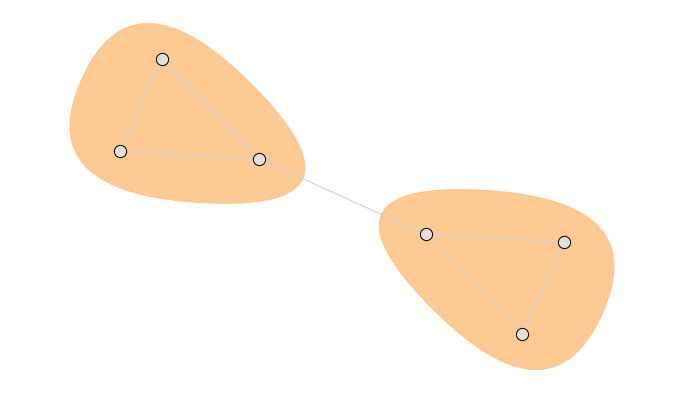

In [2]:
# Hg complex creation and visualization

edge_list_sc = [[0,1],[1,2],[2,3],[0,2],[3,4],[4,5],[3,5],[0,1,2],[3,4,5]]
sc = Hypergraph(edge_list_sc)

draw_hypergraph(sc)

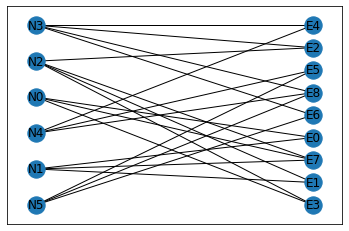

<AxesSubplot:>

In [3]:
# Bipartite graph associated (using the function in hypergraphx) visualization

draw_bipartite(sc)

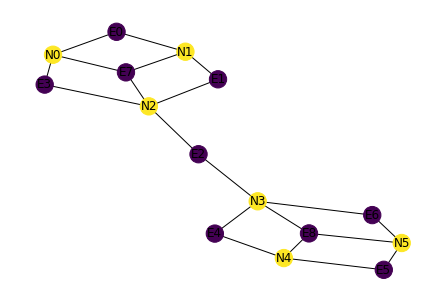

In [4]:
# Bipartite graph associated (using the function in hypergraphx) visualization coloring the nodes according to the layer

bsc_tot = bipartite_projection(sc)
bsc = bsc_tot[0]

pos = nx.spring_layout(bsc)
color_dict = bipartite.color(bsc)
cols = [color_dict[node] for node in bsc.nodes()]
nx.draw(bsc, pos, node_color = cols, with_labels=True)

In [6]:
# Application of the algorithm to the bipartite graph

result_sc = kameicock_coloring(bsc, color_dict)
print("Final coloring:", result_sc)

Final coloring: {'N0': 3, 'N1': 3, 'N2': 1, 'N3': 1, 'N4': 3, 'N5': 3, 'E0': 5, 'E1': 4, 'E2': 2, 'E3': 4, 'E4': 4, 'E5': 5, 'E6': 4, 'E7': 0, 'E8': 0}


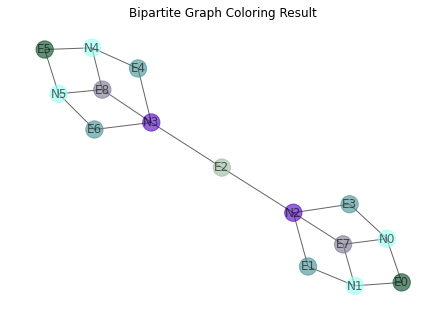

In [7]:
# Visualize the result as bipartite graph in line

pos = nx.spring_layout(bsc)
N = len(set([v for k, v in result_sc.items()]))
colors = sns.color_palette(cc.glasbey_cool[6:],N)
nx.draw(bsc, pos, node_color=[colors[result_sc[node] % len(colors)] for node in bsc.nodes()], with_labels=True, alpha = 0.6)

plt.title("Bipartite Graph Coloring Result")
plt.show()

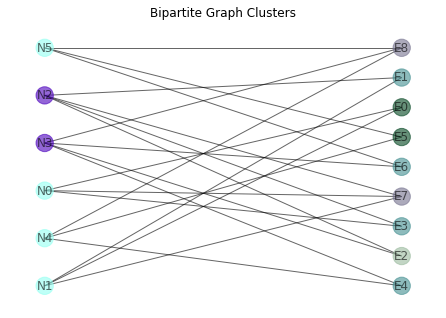

In [8]:
# Visualize the result as bipartite graph in two layers

#pos = nx.spring_layout(bhg)
pos = nx.bipartite_layout(bsc, nodes=[n for n, d in bsc.nodes(data=True) if d['bipartite'] == 0])
N = len(set([v for k, v in result_sc.items()]))
colors = sns.color_palette(cc.glasbey_cool[6:],N)

nx.draw(bsc, pos, node_color=[colors[result_sc[node] % len(colors)] for node in bsc.nodes()], with_labels=True, alpha = 0.6)

plt.title("Bipartite Graph Clusters")
plt.show()

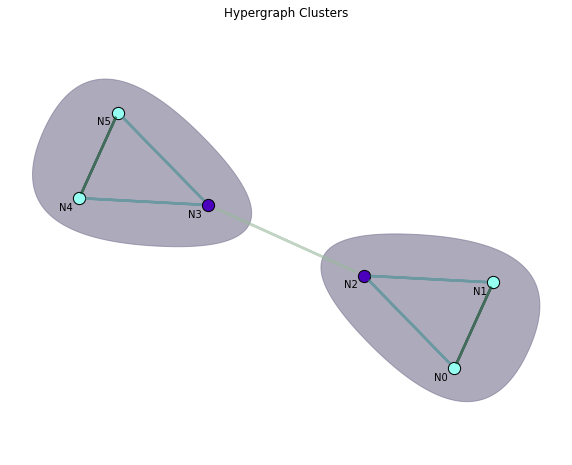

In [ ]:
# Visualize the result as hypergraph

# Dictionary associating to each edge tuple the name of the edge assigned to the corresponding node in the bipartite graph
labelling_dict_sc = bsc_tot[1]#bipartite_projection(sc)[1]
# Dictionary associating to each node of the bipartite graph a color according to the cluster
coloring_dict_sc = result_sc

# Labels
L =  dict((value, key) for key, value in labelling_dict_sc.items())

# Hypergraph creation
H = Hypergraph()

for key, value in labelling_dict_sc.items():
    if key.startswith('N'):
        H.add_node(value)
    elif key.startswith('E'):
        H.add_edge(value)

# Set up colors
N = len(set(coloring_dict_sc.values()))
colors = sns.color_palette(cc.glasbey_cool[6:], N)

# Create a mapping of elements to colors
color_mapping = {labelling_dict_sc[k]: colors[v] for k, v in coloring_dict_sc.items()}

# Plot the hypergraph
fig, ax = plt.subplots(figsize=(10, 8))
draw_hypergraph_col(H, 
        ax=ax,
        node_color=[color_mapping[node] for node in H.get_nodes()],
        edge_color=[color_mapping[edge] for edge in H.get_edges()],
        hyperedge_alpha = 0.6,
        with_node_labels=True,        
        label = L,
        edge_line_width = 2.5
        )


plt.title("Hypergraph Clusters")
plt.show()

**Hypergraph**

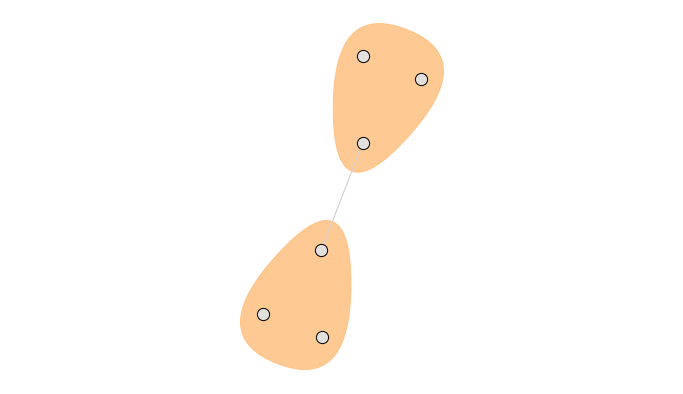

In [10]:
# Hyperedge creation and visualization

edge_list_hg = [[2,3],[1,2,0],[3,4,5]]
hg = Hypergraph(edge_list_hg)

draw_hypergraph(hg)

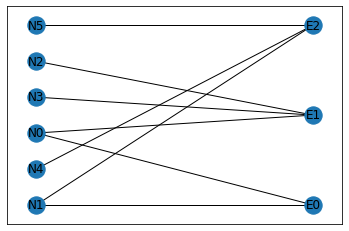

<AxesSubplot:>

In [11]:
# Bipartite graph associated (using the function in hypergraphx) visualization

draw_bipartite(hg)

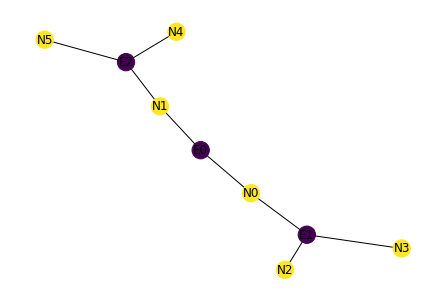

In [12]:
# Bipartite graph associated (using the function in hypergraphx) visualization coloring the nodes according to the layer

bhg = bipartite_projection(hg)[0]

pos = nx.spring_layout(bhg)
color_dict = bipartite.color(bhg)
cols = [color_dict[node] for node in bhg.nodes()]
nx.draw(bhg, pos, node_color = cols, with_labels=True)

In [13]:
# Application of the algorithm to the bipartite graph

result_hg = kameicock_coloring(bhg, color_dict)#, initial_types)
print("Final coloring:", result_hg)

Final coloring: {'N0': 3, 'N1': 3, 'N2': 0, 'N3': 0, 'N4': 0, 'N5': 0, 'E0': 1, 'E1': 2, 'E2': 2}


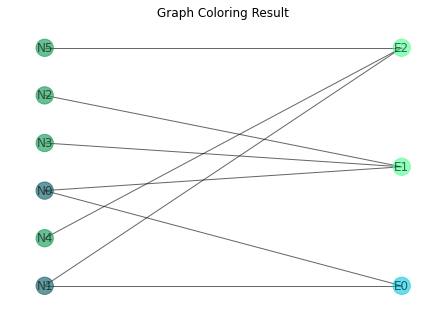

In [14]:
# Visualize the result as bipartite graph in two layers

pos = nx.bipartite_layout(bhg, nodes=[n for n, d in bhg.nodes(data=True) if d['bipartite'] == 0])
N = len(set([v for k, v in result_hg.items()]))
colors = sns.color_palette(cc.glasbey_cool[1:],N)

nx.draw(bhg, pos, node_color=[colors[result_hg[node] % len(colors)] for node in bhg.nodes()], with_labels=True, alpha = 0.6)

plt.title("Graph Coloring Result")
plt.show()

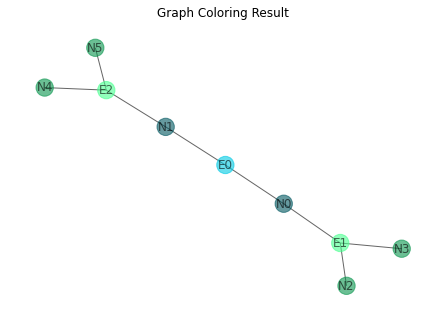

In [15]:
# Visualize the result as bipartite graph in line

pos = nx.spring_layout(bhg)
N = len(set([v for k, v in result_hg.items()]))
colors = sns.color_palette(cc.glasbey_cool[1:],N)
nx.draw(bhg, pos, node_color=[colors[result_hg[node] % len(colors)] for node in bhg.nodes()], with_labels=True, alpha = 0.6)

plt.title("Graph Coloring Result")
plt.show()

In [16]:
bipartite_projection(hg)[1]

{'N0': 2,
 'N1': 3,
 'N2': 0,
 'N3': 1,
 'N4': 4,
 'N5': 5,
 'E0': (2, 3),
 'E1': (0, 1, 2),
 'E2': (3, 4, 5)}

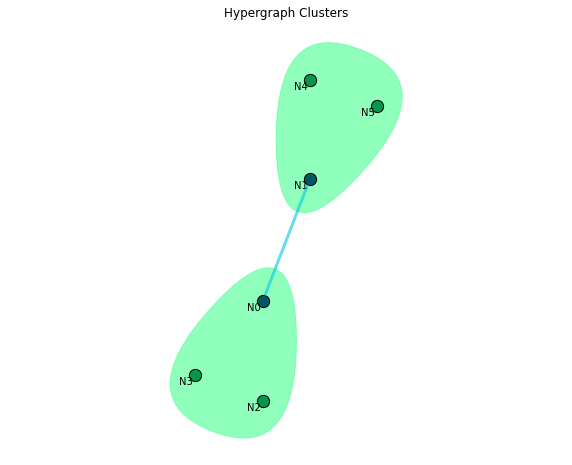

In [17]:
# Visualize the result as hypergraph

# Dictionary associating to each edge tuple the name of the edge assigned to the corresponding node in the bipartite graph
labelling_dict = bipartite_projection(hg)[1]
# Dictionary associating to each node of the bipartite graph a color according to the cluster
coloring_dict = result_hg

L =  dict((value, key) for key, value in labelling_dict.items())
# Hypergraph creation
H = Hypergraph()

# Add nodes and edges
for key, value in labelling_dict.items():
    if key.startswith('N'):
        H.add_node(value)    
    elif key.startswith('E'):
        H.add_edge(value)


# Set up colors
N = len(set(coloring_dict.values()))
colors = sns.color_palette(cc.glasbey_cool[1:], N)

# Create a mapping of elements to colors
color_mapping = {labelling_dict[k]: colors[v % len(colors)] for k, v in coloring_dict.items()}

# Plot the hypergraph
fig, ax = plt.subplots(figsize=(10, 8))
draw_hypergraph_col(H, 
        ax=ax,
        node_color=[color_mapping[node] for node in H.get_nodes()],
        edge_color=[color_mapping[edge] for edge in H.get_edges()],
        hyperedge_alpha = 0.6,
        with_node_labels=True,
        label = L,
        edge_line_width = 2.5
        )

plt.title("Hypergraph Clusters")
plt.show()

In [20]:
hyg = [[0, 1, 2, 4], [2, 3], [5,6,7], [4,5], [8,5], [0,1], [2, 4], [5,7], [5, 6]]
hg = Hypergraph(hyg)

bhg_test_t = bipartite_projection(hg)
bhg_test = bhg_test_t[0]


pos_2 = nx.spring_layout(bhg_test)
color_dict_test = bipartite.color(bhg_test)

result_hg_t = kameicock_coloring(bhg_test, color_dict_test)#, initial_types)
print("Final coloring:", result_hg_t)

# Visualize the result as simplicial complex


Final coloring: {'N0': 0, 'N1': 0, 'N2': 5, 'N3': 8, 'N4': 1, 'N5': 13, 'N6': 14, 'N7': 14, 'N8': 4, 'E0': 6, 'E1': 9, 'E2': 3, 'E3': 7, 'E4': 10, 'E5': 12, 'E6': 11, 'E7': 2, 'E8': 2}


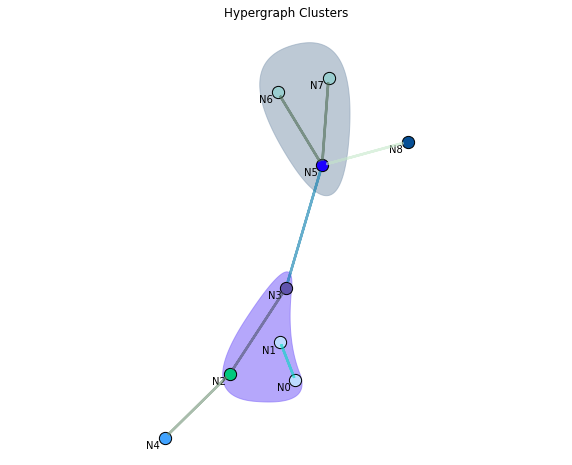

In [21]:

# Dictionary associating to each edge tuple the name of the edge assigned to the corresponding node in the bipartite graph
labelling_dict_hg_2 = bhg_test_t[1]#bipartite_projection(sc)[1]
# Dictionary associating to each node of the bipartite graph a color according to the cluster
coloring_dict_hg_2 = result_hg_t

# Labels
L =  dict((value, key) for key, value in labelling_dict_hg_2.items())

# Hypergraph creation
H = Hypergraph()

for key, value in labelling_dict_hg_2.items():
    if key.startswith('N'):
        H.add_node(value)
    elif key.startswith('E'):
        H.add_edge(value)

# Set up colors
N = len(set(coloring_dict_hg_2.values()))
colors = sns.color_palette(cc.glasbey_cool[12:], N)

# Create a mapping of elements to colors
color_mapping = {labelling_dict_hg_2[k]: colors[v] for k, v in coloring_dict_hg_2.items()}

# Plot the hypergraph
fig, ax = plt.subplots(figsize=(10, 8))
draw_hypergraph_col(H, 
        ax=ax,
        node_color=[color_mapping[node] for node in H.get_nodes()],
        edge_color=[color_mapping[edge] for edge in H.get_edges()],
        hyperedge_alpha = 0.6,
        with_node_labels=True,        
        label = L,
        edge_line_width = 2.5
        )


plt.title("Hypergraph Clusters")
plt.show()
